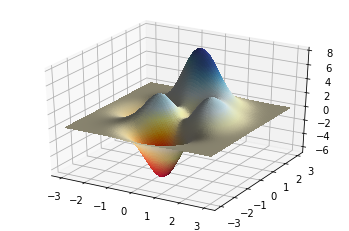

In [7]:
import numpy as np
from mayavi import mlab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource

## Test data: Matlab `peaks()`
x, y = np.mgrid[-3:3:150j,-3:3:150j]
z =  3*(1 - x)**2 * np.exp(-x**2 - (y + 1)**2) \
   - 10*(x/5 - x**3 - y**5)*np.exp(-x**2 - y**2) \
   - 1./3*np.exp(-(x + 1)**2 - y**2) 

## Mayavi
surf = mlab.surf(x, y, z, colormap='RdYlBu', warp_scale='auto')
# Change the visualization parameters.
surf.actor.property.interpolation = 'phong'
surf.actor.property.specular = 0.1
surf.actor.property.specular_power = 5



## Matplotlib
fig = plt.figure()
ax = fig.gca(projection='3d')

# Create light source object.
ls = LightSource(azdeg=0, altdeg=65)
# Shade data, creating an rgb array.
rgb = ls.shade(z, plt.cm.RdYlBu)
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0,
                       antialiased=False, facecolors=rgb)
plt.show()
mlab.show()

In [5]:
# Author: Prabhu Ramachandran <prabhu [at] aero.iitb.ac.in>
# Copyright (c) 2009, Enthought, Inc.
# License: BSD Style.

from mayavi import mlab
from tvtk.tools import visual
# Create a figure
f = mlab.figure(size=(500,500))
# Tell visual to use this as the viewer.
visual.set_viewer(f)

# A silly visualization.
mlab.test_plot3d()

# Even sillier animation.
b1 = visual.box()
b2 = visual.box(x=4.)
b3 = visual.box(x=-4)
b1.v = 5.0

@mlab.show
@mlab.animate(delay=250)
def anim():
    """Animate the b1 box."""
    while 1:
        b1.x = b1.x + b1.v*0.1
        if b1.x > 2.5 or b1.x < -2.5:
            b1.v = -b1.v
        yield

# Run the animation.
anim()

In [8]:
import numpy
from mayavi import mlab


# data
px=numpy.arange(0,10000,1)
py=numpy.arange(0,50000,5)
pz=numpy.zeros_like(px)
s=0.5
# render
pts=mlab.points3d(px,py,pz)
T_max = len(px)
delayer=40
@mlab.animate(delay=delayer)
def anim_loc():
    for i in numpy.arange(2, T_max,500):
        _x = px[0:i]
        _y = px[0:i]
        _z = pz[0:i]
        pts.mlab_source.reset( x = _x, y = _y, z = _z, )
        yield

anim_loc()
mlab.show()

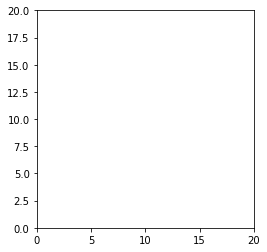

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

nx = 20
ny = 20

fig = plt.figure()
plt.axis([0,nx,0,ny])
ax = plt.gca()
ax.set_aspect(1)

def init():
    # initialize an empty list of cirlces
    return []

def animate(i):
    # draw circles, select to color for the circles based on the input argument i. 
    someColors = ['r', 'b', 'g', 'm', 'y']
    patches = []
    for x in range(0,nx):
        for y in range(0,ny):
            patches.append(ax.add_patch( plt.Circle((x+0.5,y+0.5),0.45,color=someColors[i % 5]) ))
    return patches

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=10, interval=20, blit=True)
plt.show()

In [6]:
from IPython.display import HTML

HTML(anim.to_html5_video())